# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/).

Some of the questions get kind of weird in this one, especially later on. **Feel free to lean on ChatGPT for the crazier ones!** It might be an interesting exploration of how to ask problems or explain what your dataset looks like.

## Do your importing and your setup

In [1]:
import pandas as pd

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [4]:
df = pd.read_excel('NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx')
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [10]:
len(df)
if len(df) > 30000:
    df = df.head(30000)
#len(df)

In [11]:
df.dtypes

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [ ]:
#Each row is a pet dog with multiple identifiers. Gender tells us if it the dog is a male or female, vaccinated tells us if the dog is vaccinated or not

# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

In [ ]:
#1. How many single-breed dogs are spayed/neutered?
#2. Which zipcode has the most unvaccinated dogs?
#3. How many senior dogs (age>8) are male?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

Primary Breed
Unknown                                 4777
Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Name: count, dtype: int64


<Axes: xlabel='Primary Breed'>

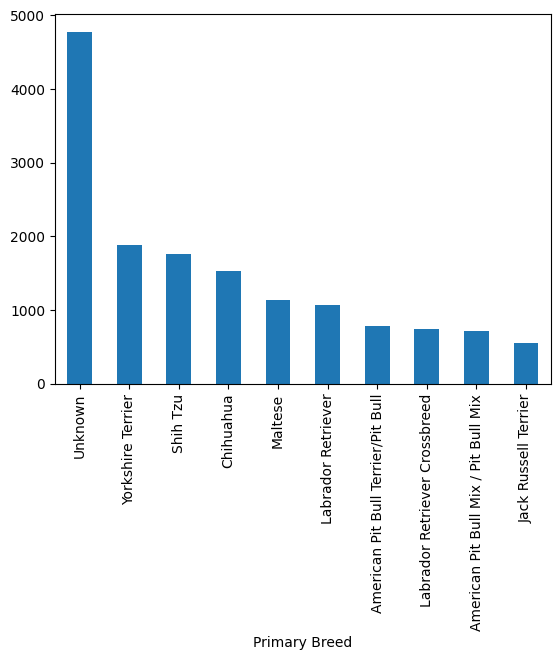

In [13]:
popular_dogs=df['Primary Breed'].value_counts().head(10)
print(popular_dogs)
import matplotlib as plot
popular_dogs.plot(kind='bar')

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

In [22]:
popular_known_dogs =df[df['Primary Breed'] != 'Unknown']
popular_known_dogs['Primary Breed'].value_counts().head(10)


Primary Breed
Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Beagle                                   546
Name: count, dtype: int64

## What are the most popular dog names?

In [33]:
df['Animal Name'].value_counts().head(10)

Animal Name
UNKNOWN    203
Max        202
Unknown    197
Bella      193
Charlie    172
Lola       146
Rocky      140
Lucy       128
Coco       114
Buddy      113
Name: count, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [30]:
names = df['Animal Name'].value_counts()

radhika = names["Radhika"] if "Radhika" in names else 0
max = names["Max"] if "Max" in names else 0
maxwell = names["Maxwell"] if "Maxwell" in names else 0
print(f"Number of digs names 'Radhika':{radhika}")
print(f"Number of dogs named 'Max': {max}")
print(f"Number of dogs named 'Maxwell': {maxwell}")


Number of digs names 'Radhika':0
Number of dogs named 'Max': 202
Number of dogs named 'Maxwell': 11


## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [31]:
df["Guard or Trained"].value_counts(normalize=True).round(3)

Guard or Trained
No     0.999
Yes    0.001
Name: proportion, dtype: float64

## What are the actual numbers?

In [32]:
df["Guard or Trained"].value_counts()

Guard or Trained
No     19809
Yes       17
Name: count, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [37]:
df["Guard or Trained"].value_counts(dropna=False)

Guard or Trained
No     19809
NaN    10174
Yes       17
Name: count, dtype: int64

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [42]:
df['Guard or Trained'].fillna('No', inplace=True)
df["Guard or Trained"].value_counts()

Guard or Trained
No     29983
Yes       17
Name: count, dtype: int64

## What are the top dog breeds for guard dogs? 

In [45]:
guard_dogs = df[df['Guard or Trained'] == 'Yes']
guard_dog_breeds = guard_dogs['Primary Breed'].value_counts()
print(guard_dog_breeds)

Primary Breed
Unknown                       5
German Shepherd Dog           3
Poodle, Standard              1
German Shepherd Crossbreed    1
Labrador Retriever            1
Doberman Pinscher             1
Shih Tzu                      1
Rottweiler                    1
Golden Retriever              1
Schnauzer, Miniature          1
Yorkshire Terrier             1
Name: count, dtype: int64


## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [46]:
df['year'] = df['Animal Birth'].apply(lambda birth: birth.year)
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [48]:
import datetime as dt
current_year = dt.datetime.now().year
df['age'] = current_year - df['year']
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,16
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,10
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,9
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,15
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,9


In [52]:
average_age = df['age'].mean()
print(f"Average age of dogs: {average_age:.2f} years")

Average age of dogs: 13.71 years


# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

Here's an example of how you can merge two dataframes:

```python
merged = prisons_df.merge(states_df, left_on='state', right_on='name')
```

In the example above, `prisons_df` has a column called `state` that matches with the `name` column of `states_df`. The columns of `states_df` are then added to `prisons_df` and returned as a new dataframe called `merged`.

> **Rows without a match get discarded because it is an [inner join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).** I think left joins are probably the most common (keep rows from the "left" df even if they don't have a match in the right. For example, by default a prison with the state of `PUERTO RICO` would be dropped if PR wasn't in `states_df`, but if you changed it to `how='left'` it would be preserved, but the additional columns would just be `NaN`.

In [55]:
zipcodes_df = pd.read_csv('zipcodes-neighborhoods.csv')

In [58]:
merged_df = df.merge(zipcodes_df, left_on='Owner Zip Code', right_on='zip')
merged_df.head()


,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age,neighborhood,zip,borough
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,16,Upper West Side,10024,Manhattan
1,10024,Louie,M,Unknown,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,15,Upper West Side,10024,Manhattan
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,No,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,12,Upper West Side,10024,Manhattan
3,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,No,Yes,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,12,Upper West Side,10024,Manhattan
4,10024,Harlen,M,Unknown,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,No,Yes,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,16,Upper West Side,10024,Manhattan


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [66]:
bronx_df = merged_df[merged_df['borough'] == 'Bronx']
bronx_popular_names = bronx_df['Animal Name'].value_counts().idxmax()

brooklyn_df = merged_df[merged_df['borough'] == 'Brooklyn']
brooklyn_popular_names = brooklyn_df['Animal Name'].value_counts().idxmax()

ues_df = merged_df[merged_df['neighborhood'] == 'Upper East Side']
ues_popular_names = ues_df['Animal Name'].value_counts().idxmax()

print(f"Most popular dog name in the Bronx: {bronx_popular_names}")
print(f"Most popular dog name in Brooklyn: {brooklyn_popular_names}")
print(f"Most popular dog name on the Upper East Side: {ues_popular_names}")


Most popular dog name in the Bronx: Bella
Most popular dog name in Brooklyn: Unknown
Most popular dog name on the Upper East Side: Charlie


## What is the most common dog breed in each of the neighborhoods of NYC?

In [36]:
filtered_df = merged_df[merged_df['Primary Breed'] != 'Unknown']
most_common_breeds_by_neighborhood = filtered_df.groupby('neighborhood')['Primary Breed'].apply(lambda x: x.value_counts().idxmax())
print(most_common_breeds_by_neighborhood)


neighborhood
Borough Park                                        Yorkshire Terrier
Bronx Park and Fordham                              Yorkshire Terrier
Bushwick and Williamsburg                           Yorkshire Terrier
Canarsie and Flatlands                                       Shih Tzu
Central Bronx                                       Yorkshire Terrier
Central Brooklyn                                             Shih Tzu
Central Harlem                                              Chihuahua
Central Queens                                      Yorkshire Terrier
Chelsea and Clinton                                         Chihuahua
East Harlem                                         Yorkshire Terrier
East New York and New Lots                          Yorkshire Terrier
Flatbush                                                     Shih Tzu
Gramercy Park and Murray Hill                       Yorkshire Terrier
Greenpoint                                                  Chihuahua
Greenwi

## What breed of dogs are the least likely to be spayed? Male or female?

In [77]:
spayed_stats = merged_df.groupby(['Primary Breed', 'Animal Gender'])['Spayed or Neut'].value_counts(normalize=True).head(1)
print(spayed_stats)


Primary Breed  Animal Gender  Spayed or Neut
Affenpinscher  F              No                1.0
Name: proportion, dtype: float64


## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [82]:
merged_df['monochrome'] = merged_df.apply(lambda row: all(str(color).lower() in ['black', 'white', 'grey'] for color in [row['Animal Dominant Color'], row['Animal Secondary Color'], row['Animal Third Color']]), axis=1)
merged_df['monochrome'].sum()

69

## How many dogs are in each borough? Plot it in a graph.

<Axes: title={'center': 'No. of dogs in each borough'}, xlabel='borough', ylabel='Number of dogs'>

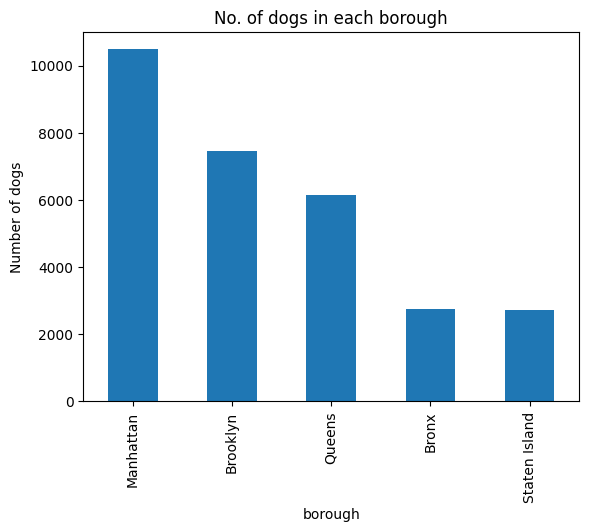

In [90]:

import matplotlib as plot

merged_df['borough'].value_counts().plot(kind = "bar", ylabel = 'Number of dogs', title = "No. of dogs in each borough")


## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [96]:
population_df = pd.read_csv('boro_population.csv')
new_merged_df = merged_df.merge(population_df, left_on='borough', right_on='borough')
new_merged_df

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,...,License Issued Date,License Expired Date,year,age,neighborhood,zip,borough,monochrome,population,area_sqmi
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,...,2015-09-19,2016-09-19,2007,16,Upper West Side,10024,Manhattan,False,1644518,23
1,10024,Louie,M,Unknown,Coonhound,Black,White,Brown,2008-05-01,Yes,...,2014-09-15,2017-09-03,2008,15,Upper West Side,10024,Manhattan,False,1644518,23
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,...,2014-09-16,2017-10-11,2011,12,Upper West Side,10024,Manhattan,False,1644518,23
3,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,...,2014-09-18,2019-09-18,2011,12,Upper West Side,10024,Manhattan,False,1644518,23
4,10024,Harlen,M,Unknown,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,...,2014-09-25,2016-08-20,2007,16,Upper West Side,10024,Manhattan,False,1644518,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29568,11436,Jack,M,Jack Russell Terrier,NaN,WHITE,BLACK,BROWN,2010-01-01,Yes,...,2015-08-09,2016-08-10,2010,13,Jamaica,11436,Queens,False,2339150,109
29569,11436,ROXY,F,Unknown,\HAR PEI X,BLACK,NaN,NaN,2003-01-01,Yes,...,2015-08-12,2017-08-30,2003,20,Jamaica,11436,Queens,False,2339150,109
29570,11436,marco,M,Yorkshire Terrier,NaN,BROWN,GRAY,NaN,2009-01-01,No,...,2015-08-13,2016-08-20,2009,14,Jamaica,11436,Queens,False,2339150,109
29571,11436,Maximilian,M,Shih Tzu,NaN,WHITE,TAN,NaN,2004-01-01,Yes,...,2015-08-19,2016-08-30,2004,19,Jamaica,11436,Queens,False,2339150,109


In [100]:
borough_dog_counts = new_merged_df['borough'].value_counts()

borough_population = new_merged_df.groupby('borough')['population'].mean()

dogs_per_capita = borough_dog_counts / borough_population

highest_dogs_per_capita_borough = dogs_per_capita.idxmax()

print(f"Borough with the highest number of dogs per capita: {highest_dogs_per_capita_borough}")


Borough with the highest number of dogs per capita: Manhattan


## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? This is very crazy, so ask in Slack, or a TA, or our buddy ChatGPT.

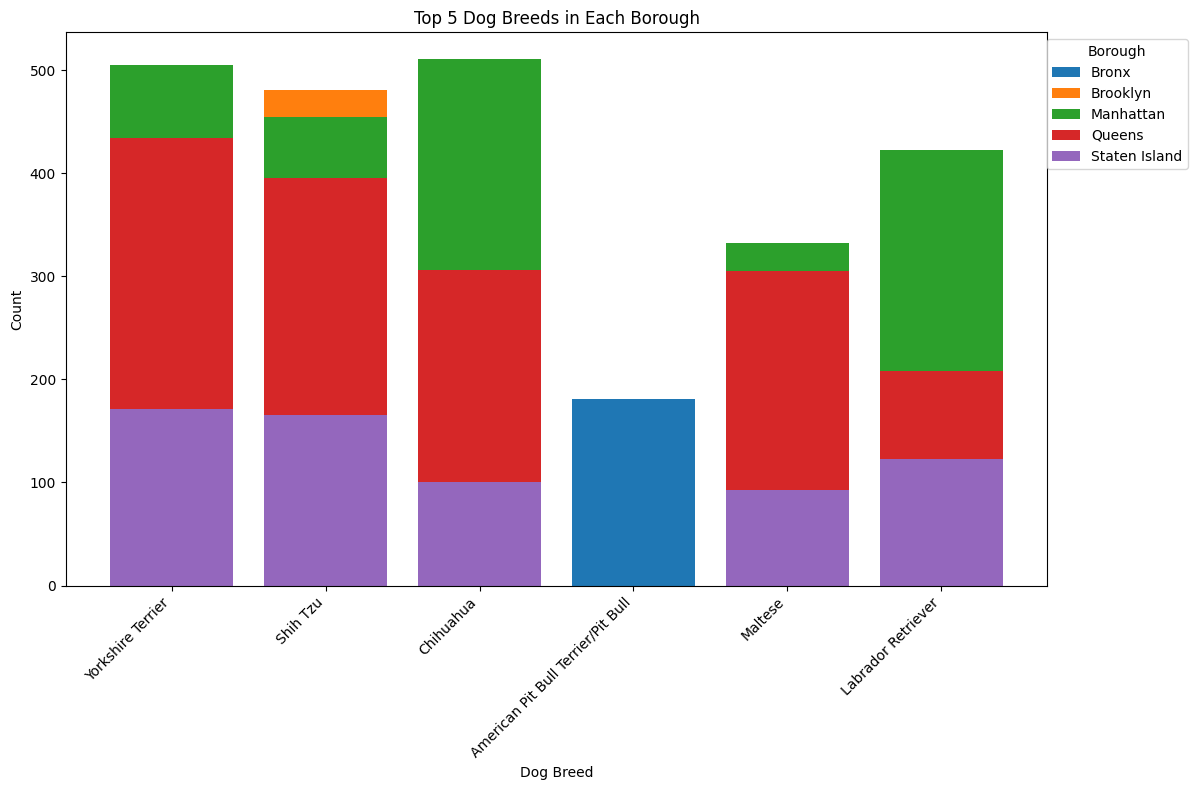

In [103]:
import matplotlib.pyplot as plt

filtered_df = merged_df[merged_df['Primary Breed'] != 'Unknown']

# Group by borough and breed, and count the occurrences of each breed
borough_breed_counts = filtered_df.groupby(['borough', 'Primary Breed']).size().reset_index(name='count')

# Sort the dataframe by count in descending order within each borough
borough_breed_counts = borough_breed_counts.sort_values(['borough', 'count'], ascending=[True, False])

# Select the top 5 breeds for each borough
top5_breeds_by_borough = borough_breed_counts.groupby('borough').head(5)

# Plot the data
plt.figure(figsize=(12, 8))
colors = plt.cm.tab10.colors
for i, (borough, data) in enumerate(top5_breeds_by_borough.groupby('borough')):
    plt.bar(data['Primary Breed'], data['count'], label=borough, color=colors[i])

plt.title('Top 5 Dog Breeds in Each Borough')
plt.xlabel('Dog Breed')
plt.ylabel('Count')
plt.legend(title='Borough', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## What percentage of dogs are not guard dogs?

In [104]:
df["Guard or Trained"].value_counts(normalize=True).round(3)

Guard or Trained
No     0.999
Yes    0.001
Name: proportion, dtype: float64